In [230]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from heat_kernel_func import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
test_G = nx.karate_club_graph()

In [101]:
test_pos={0: np.array([-0.30434242, -0.14024577]),
 1: np.array([-0.36077641, -0.48301576]),
 2: np.array([-0.05618779, -0.14934998]),
 3: np.array([-0.2440174 , -0.57426514]),
 4: np.array([-0.4986237 ,  0.41118061]),
 5: np.array([-0.49641011,  0.62678333]),
 6: np.array([-0.67220677,  0.52656327]),
 7: np.array([-0.51598858, -0.41693857]),
 8: np.array([-0.08952953,  0.00925073]),
 9: np.array([-0.41395113, -0.06259218]),
 10: np.array([-0.28774623,  0.54049174]),
 11: np.array([-0.1185092 , -0.87004081]),
 12: np.array([-0.02667885, -0.73342338]),
 13: np.array([-0.081021  , -0.40506307]),
 14: np.array([-0.22484414,  0.1696524 ]),
 15: np.array([-0.12623723,  0.30191665]),
 16: np.array([-0.71723965,  1.        ]),
 17: np.array([-0.75401087, -0.51692552]),
 18: np.array([ 0.55164989, -0.29997927]),
 19: np.array([ 0.06034646, -0.45810067]),
 20: np.array([0.7098781, 0.0757466]),
 21: np.array([-0.49855294, -0.75611824]),
 22: np.array([0.0425888 , 0.41771905]),
 23: np.array([0.63767808, 0.29288079]),
 24: np.array([0.83232462, 0.5093583 ]),
 25: np.array([0.82127503, 0.64883159]),
 26: np.array([ 0.83827217, -0.28060708]),
 27: np.array([0.42721084, 0.34982116]),
 28: np.array([0.20522982, 0.25748532]),
 29: np.array([ 0.67088105, -0.06441235]),
 30: np.array([-0.19458499, -0.2224972 ]),
 31: np.array([0.40924516, 0.24883891]),
 32: np.array([0.24218568, 0.0734374 ]),
 33: np.array([ 0.23269322, -0.02638288])}

In [16]:
ts = [.1, 1, 10]

In [17]:
hks_time_dict = hks_s(test_G, ts, list(test_G.nodes()))

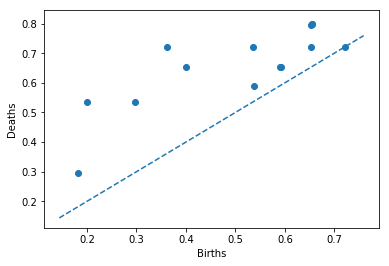

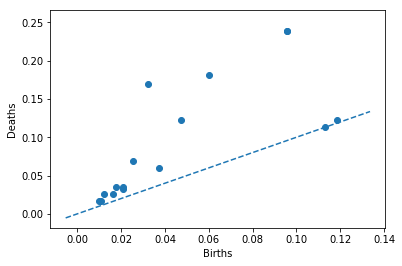

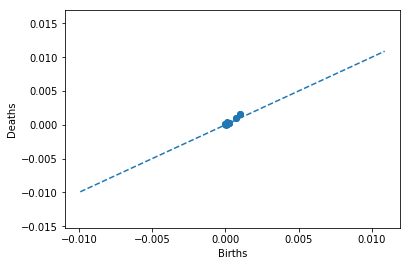

In [44]:
for t in ts:
    C, PD_points = persistence_diagram(test_G, f=hks_time_dict[t])
    plt.figure()
    plt.xlabel('Births')
    plt.ylabel('Deaths')
    plot_PD(PD_points)
    plt.show()

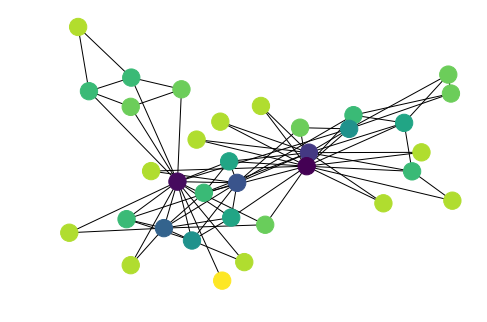

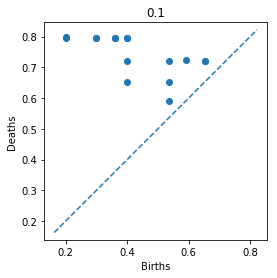

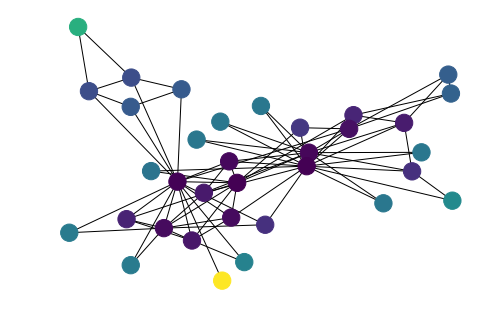

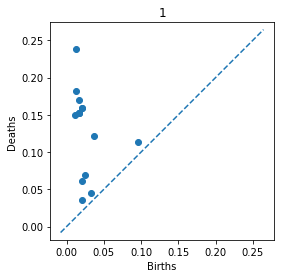

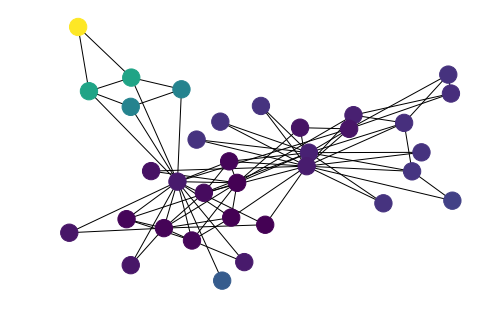

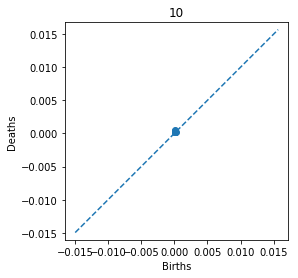

In [147]:
for t in ts:
    C, PD_points = persistence_diagram(test_G, f=hks_time_dict[t], verbose=False)
#     print (PD_points)
    nx.draw(test_G, test_pos, node_color=[hks_time_dict[t][node] for node in test_G.nodes])
    plt.figure(figsize=(4,4))
    plt.xlabel('Births')
    plt.ylabel('Deaths')
    plot_PD(PD_points)
    plt.title(t)
    plt.show()


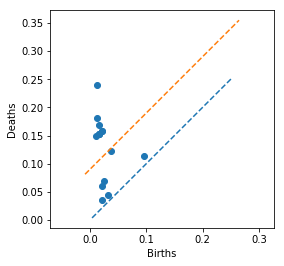

In [159]:
C, PD_points = persistence_diagram(test_G, f=hks_time_dict[1])
plt.figure(figsize=(4,4))
plt.xlabel('Births')
plt.xlim([0, 0.2])
plt.ylim([0, 0.2])
plt.ylabel('Deaths')
plot_PD(PD_points, tau=.09)
plt.savefig('karate_t10.png', type='png', dpi=300)
plt.show()

In [9]:
c = {1: '1', 2: '2'}
nbrs = [1, 2]
local_max = set.intersection(set(nbrs), set(c.keys()))
print(len(local_max))
c[1]['parent'] = 2
print(c)

2


TypeError: 'str' object does not support item assignment

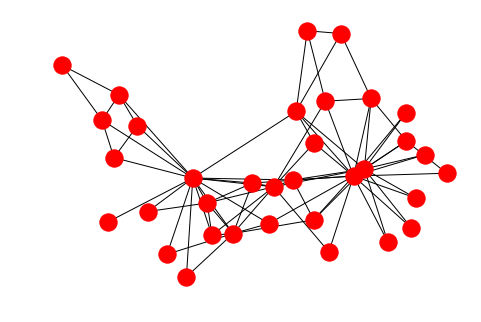

In [10]:
nx.draw(test_G)
plt.savefig('karate.png', type='png', dpi=300)

{4: (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), 7: (1.0, 0.4980392156862745, 0.054901960784313725, 1.0), 11: (0.596078431372549, 0.8745098039215686, 0.5411764705882353, 1.0), 16: (0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0), 19: (0.7686274509803922, 0.611764705882353, 0.5803921568627451, 1.0), 26: (0.4980392156862745, 0.4980392156862745, 0.4980392156862745, 1.0), 28: (0.8588235294117647, 0.8588235294117647, 0.5529411764705883, 1.0), 30: (0.6196078431372549, 0.8549019607843137, 0.8980392156862745, 1.0)}


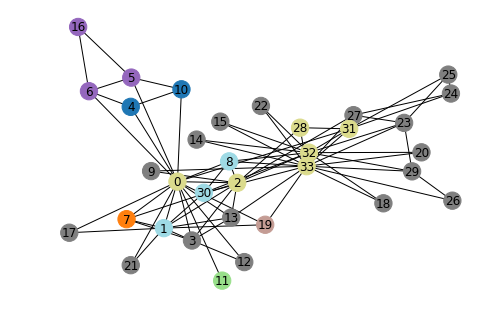

In [236]:
C, PD_points = persistence_diagram(test_G, f=hks_time_dict[1], tau=.09, verbose=False)
plot_segments(test_G, C, test_pos, labels=True)

In [204]:
{node: get_root(node, C) for node in C}

{11: 11,
 16: 16,
 26: 26,
 12: 26,
 17: 26,
 21: 26,
 20: 26,
 22: 26,
 14: 26,
 18: 26,
 15: 26,
 9: 26,
 24: 26,
 25: 26,
 4: 4,
 10: 4,
 6: 16,
 5: 16,
 28: 28,
 19: 19,
 29: 26,
 27: 26,
 7: 7,
 23: 26,
 30: 30,
 3: 26,
 31: 28,
 1: 30,
 13: 26,
 8: 30,
 32: 28,
 0: 28,
 33: 28,
 2: 28}

In [175]:
set([child for child, parent in C.items() if child==parent])

{4, 7, 11, 16, 19, 26, 28, 30}

In [177]:
set(get_root(node) for node in C.keys())

{4, 7, 11, 16, 19, 26, 28, 30}

In [181]:
get_root(14, C)

26